In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Reading the already pre-processed training and test data
train_df = pd.read_csv('/kaggle/input/project-data-files/processed_train.csv')
test_df = pd.read_csv('/kaggle/input/project-data-files/processed_test.csv')

# Splitting the training data

In [3]:
# Separate the features and target for the target data
X = train_df.drop('Default', axis=1)
y = train_df['Default']

# Separate the LoanId for the test data
X_sub = test_df.drop('LoanID', axis=1)

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

# Check the shape of the splits
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (163421, 16)
X_test shape:  (40856, 16)
y_train shape:  (163421,)
y_test shape:  (40856,)


# **Prediction Models**

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Using Random Grid Search CV
rfc = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 120, 140],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [10, 12, 14, 16]
}
rfc_random_grid_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid_rf, n_iter=5, cv=5, n_jobs=-1, verbose=1)

In [6]:
# Finding the best RF model
best_rfc_model = rfc_random_grid_search.fit(X_train,y_train)
best_rfc_estimator = best_rfc_model.best_estimator_
# Printing details
print("Details of the best random forest estimator:")
print(best_rfc_model.best_estimator_)
print("No. of estimators: " + str(best_rfc_estimator.n_estimators))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Details of the best random forest estimator:
RandomForestClassifier(max_depth=10, max_features=16, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=120, random_state=42)
No. of estimators: 120


In [7]:
# Printing details of the best estimator
print("Details of the best random forest estimator:")
print(best_rfc_model.best_estimator_)
print("No. of estimators: " + str(best_rfc_estimator.n_estimators))

Details of the best random forest estimator:
RandomForestClassifier(max_depth=10, max_features=16, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=120, random_state=42)
No. of estimators: 120


In [8]:
# Checking with the validation data
y_rfc_pred = best_rfc_estimator.predict(X_test)
accuracy_score(y_test, y_rfc_pred)

0.8848394360681417

In [40]:
print(classification_report(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     36085
           1       0.60      0.04      0.08      4771

    accuracy                           0.88     40856
   macro avg       0.74      0.52      0.51     40856
weighted avg       0.85      0.88      0.84     40856



In [10]:
# Predicting on the test data
y_rfc_sub = best_rfc_estimator.predict(X_sub)

# Writing into the submission file
results_rfc_df = pd.DataFrame({
    'LoanID': test_df['LoanID'],
    'Default': y_rfc_sub
})
results_rfc_df.to_csv('predictions_randomized_rf.csv', index=False)

# Ada Boost

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
# Initializing objects for AdaBoost
base_estimator = DecisionTreeClassifier()
adb = AdaBoostClassifier(base_estimator, random_state=56)
param_grid_adb = {
    'n_estimators': [80,100,120],    
    'learning_rate': [0.1, 0.3, 0.6, 0.99],          
    'base_estimator__max_depth': [1,5,10,20]           
    # 'base_estimator__min_samples_split': [2,4,6],   
    # 'base_estimator__min_samples_leaf': [2,4,6]     
}

In [13]:
# Running adaboost
adb_random_grid = RandomizedSearchCV(estimator=adb, param_distributions=param_grid_adb, n_iter=5, cv=5, random_state=56, n_jobs=-1, verbose=1)
best_adb = adb_random_grid.fit(X_train,y_train)

# Print the details of the best estimator
best_adb_estimator = best_adb.best_estimator_
print(best_adb_estimator)

# Predicting values for the validation data and checking the accuracy
y_pred_adb = best_adb.predict(X_test)
print(accuracy_score(y_test,y_pred_adb))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.6, n_estimators=100, random_state=56)


0.8848394360681417

In [41]:
print(classification_report(y_test, y_pred_adb))

0.8846681026042686
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     36085
           1       0.58      0.04      0.08      4771

    accuracy                           0.88     40856
   macro avg       0.73      0.52      0.51     40856
weighted avg       0.85      0.88      0.84     40856



In [14]:
# Predicting on the test data
y_adb_sub = best_adb.predict(X_sub)

# Writing into the submission file
results_adb_df = pd.DataFrame({
    'LoanID': test_df['LoanID'],
    'Default': y_adb_sub
})
results_adb_df.to_csv('predictions_randomized_adb.csv', index=False)

# Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
# Initializing objects for Gradient Boosting
gbc = GradientBoostingClassifier(random_state=56)
param_grid_gbc = {
    'n_estimators': [80, 100, 120, 175, 200],
    'learning_rate': [0.1, 0.3],
    'max_depth': [1, 3, 7],
    # Uncomment below if you want to tune further parameters
    # 'min_samples_split': [2, 4, 6],
    # 'min_samples_leaf': [2, 4, 6]
}

In [17]:
# Using RandomizedSearchCV on training data
gbc_random_grid = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid_gbc, n_iter=5, cv=5, random_state=56, n_jobs=-1, verbose=1)
best_gbc = gbc_random_grid.fit(X_train, y_train)

# Getting the details of the best estimator
best_gbc_estimator = best_gbc.best_estimator_
print(best_gbc_estimator)

# Predicting values for the validation data and checking accuracy
y_gbc_pred = best_gbc.predict(X_test)
accuracy_score(y_test,y_gbc_pred)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
GradientBoostingClassifier(n_estimators=120, random_state=56)


0.8854758175053847

In [38]:
print(classification_report(y_test, y_gbc_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     36085
           1       0.61      0.05      0.10      4771

    accuracy                           0.89     40856
   macro avg       0.75      0.52      0.52     40856
weighted avg       0.86      0.89      0.84     40856



In [19]:
# Predicting on the test data with the best Gradient Boosting model
y_gbc_sub = best_gbc.predict(X_sub)

# Writing into the submission file
results_gbc_df = pd.DataFrame({
    'LoanID': test_df['LoanID'],
    'Default': y_gbc_sub
})
results_gbc_df.to_csv('predictions_randomized_gbc.csv', index=False)

# Decision Trees

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Initializing objects for the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=56)
param_grid_dtc = {
    'max_depth': [1, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [22]:
# Running Decision Tree with RandomizedSearchCV
dtc_random_grid = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid_dtc, n_iter=5, cv=5, random_state=56, n_jobs=-1, verbose=1)
best_dtc = dtc_random_grid.fit(X_train, y_train)

# Get the details of the best estimator
best_dtc_estimator = best_dtc.best_estimator_
print(best_dtc_estimator)

# Predict values for the validation data and calculate accuracy
y_dtc_pred = best_dtc.predict(X_test)
accuracy_score(y_test, y_dtc_pred)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2,
                       min_samples_split=5, random_state=56)


0.8832240062659096

In [37]:
print(classification_report(y_test, y_dtc_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     36085
           1       0.00      0.00      0.00      4771

    accuracy                           0.88     40856
   macro avg       0.44      0.50      0.47     40856
weighted avg       0.78      0.88      0.83     40856



In [24]:
# Predicting on the test data with the best Decision Tree model
y_dtc_sub = best_dtc.predict(X_sub)

# Writing the predictions into the submission file
results_dtc_df = pd.DataFrame({
    'LoanID': test_df['LoanID'],
    'Default': y_dtc_sub
})
results_dtc_df.to_csv('predictions_randomized_dtc.csv', index=False)

# K - Nearest Neighbours

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [26]:
# scaling the training data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# splitting the training data
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled,y, test_size=0.2, random_state=56)
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

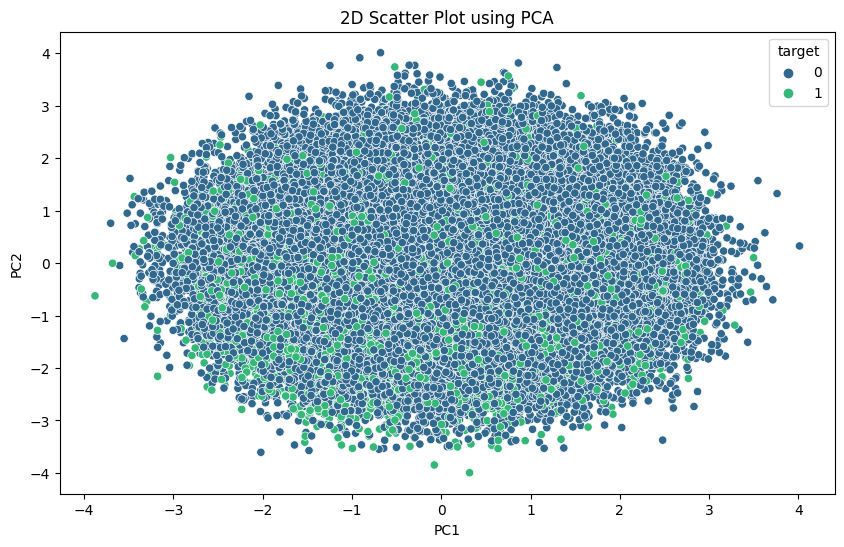

In [28]:
# visualizing the data after transforming 16 dimensions to 2 dimensions

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled_df)

X_pca2_df = pd.DataFrame(X_pca2, columns=['PC1', 'PC2'])
X_pca2_df['target'] = y

plt.figure(figsize=(10, 6))

sns.scatterplot(x='PC1', y='PC2', hue='target', data=X_pca2_df, palette='viridis')
plt.title('2D Scatter Plot using PCA')
plt.show()

In [29]:
k_values = [i for i in range (3,7)]

scores = []

for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_scaled, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

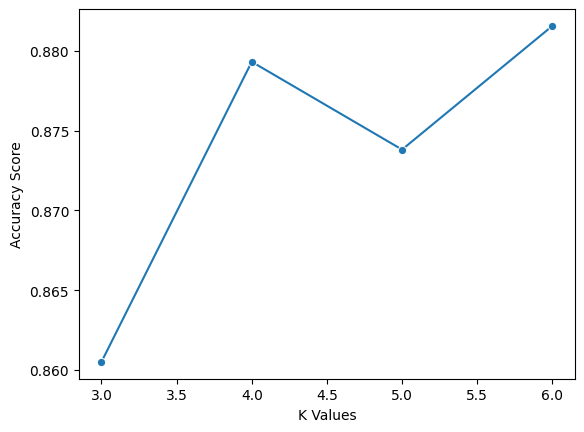

In [30]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [31]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_scaled_train, Y_scaled_train)

KNeighborsClassifier(n_neighbors=6)

In [32]:
y_knn_pred = knn.predict(X_scaled_test)
accuracy_score(y_knn_pred, Y_scaled_test)

0.881094576072058

In [36]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     36085
           1       0.39      0.03      0.06      4771

    accuracy                           0.88     40856
   macro avg       0.64      0.51      0.50     40856
weighted avg       0.83      0.88      0.83     40856



In [34]:
# Predicting on the test data with the best Decision Tree model after scaling
X_scaled = scaler.fit_transform(X_sub)
y_knn_sub = knn.predict(X_sub)

# Writing the predictions into the submission file
results_knn_df = pd.DataFrame({
    'LoanID': test_df['LoanID'],
    'Default': y_knn_sub
})
results_knn_df.to_csv('predictions_randomized_knn.csv', index=False)

In [35]:
y_knn_sub.sum()

0